<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
%matplotlib inline

In [2]:
CAvideos = pd.read_csv('Trending Youtube Video Statistics\CAvideos.csv')
DEvideos = pd.read_csv('Trending Youtube Video Statistics\DEvideos.csv')
FRvideos = pd.read_csv('Trending Youtube Video Statistics\FRvideos.csv')
GBvideos = pd.read_csv('Trending Youtube Video Statistics\GBvideos.csv')
INvideos = pd.read_csv('Trending Youtube Video Statistics\INvideos.csv')
JPvideos = pd.read_csv('Trending Youtube Video Statistics\JPvideos.csv', encoding='latin-1')
KRvideos = pd.read_csv('Trending Youtube Video Statistics\KRvideos.csv', encoding='latin-1')
MXvideos = pd.read_csv('Trending Youtube Video Statistics\MXvideos.csv', encoding='latin-1')
RUvideos = pd.read_csv('Trending Youtube Video Statistics\RUvideos.csv', encoding='latin-1')
USvideos = pd.read_csv('Trending Youtube Video Statistics\\USvideos.csv', encoding='latin-1')

In [3]:
CAvideos['Country'] = 'Canada'
DEvideos['Country'] = 'Germany'
FRvideos['Country'] = 'France'
GBvideos['Country'] = 'United Kingdom'
INvideos['Country'] = 'India'
JPvideos['Country'] = 'Japan'
KRvideos['Country'] = 'Korea'
MXvideos['Country'] = 'Mexico'
RUvideos['Country'] = 'Russia'
USvideos['Country'] = 'Unites States'

In [4]:
CAvideos.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,Canada
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,Canada
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Canada
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,Canada
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,Canada


In [5]:
CAvideos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
Country                   object
dtype: object

In [6]:
ALL_videos = [CAvideos,DEvideos,FRvideos,GBvideos,INvideos,JPvideos,KRvideos,MXvideos,RUvideos,USvideos]
ALL_videos = pd.concat(ALL_videos)

In [7]:
ALL_videos.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
16590,nV41A8L1r3U,18.07.02,Why Nintendo Closed the Miiverse,SootHouse,23,2018-02-06T20:00:02.000Z,"soothouse|""soot""|""house""|""miiverse""|""closed""|""...",273102,19967,240,2164,https://i.ytimg.com/vi/nV41A8L1r3U/default.jpg,False,False,False,Thanks Nintendo!\n\n=====THE GANG=====\nWilbur...,Canada
11330,u7xlGcLGTu8,18.09.01,The 1918 Pandemic: The Deadliest Flu in History,SciShow,27,2018-01-07T22:00:02.000Z,"SciShow|""science""|""Hank""|""Green""|""education""|""...",168122,7205,494,718,https://i.ytimg.com/vi/u7xlGcLGTu8/default.jpg,False,False,False,The science behind why the 1918 flu is “the mo...,Canada
37399,0LN5ci9rT9c,18.29.05,Top 5 des preuves que tu vis chez ton chat (et...,Topito,24,2018-05-28T15:06:55.000Z,"Topito|""Top""|""Liste""|""chat""|""chaton""|""mignon""|...",248326,17747,717,1196,https://i.ytimg.com/vi/0LN5ci9rT9c/default.jpg,False,False,False,"Il choisit où tu peux t'asseoir, dormir, mange...",France
21442,9dmij6g-iZc,18.03.03,5 Japanese Commercials w/ American Celebrities,Good Mythical Morning,24,2018-02-26T11:02:00.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",686319,12580,633,970,https://i.ytimg.com/vi/9dmij6g-iZc/default.jpg,False,False,False,Did Gwen Stefani or Arnold Schwarzenegger play...,Unites States
6003,BLOIU9DpLq4,17.14.12,G-Eazy with Halsey - Him & I,Jimmy Kimmel Live,23,2017-12-13T12:00:01.000Z,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",292073,12967,284,750,https://i.ytimg.com/vi/BLOIU9DpLq4/default.jpg,False,False,False,G-Eazy and Halsey perform Him & I on Jimmy Kim...,United Kingdom
33900,xOANcHT4SOA,18.11.05,Caballero & JeanJass - Clonez-moi,CaballeroJeanJassVEVO,10,2018-05-09T08:55:00.000Z,"Caballero|""JeanJass""|""Clonez-moi""|""Universal""|...",269299,16088,583,606,https://i.ytimg.com/vi/xOANcHT4SOA/default.jpg,False,False,False,DH3 disponible en pré-commande physique & digi...,France
8613,O8PQk1CBkYg,17.27.12,"10 ÐÐ ÐÐÐÐÐÐÐÐ, ÐÐÐ¢ÐÐ Ð«Ð Ð¡ÐÐ...",tophype,24,2017-12-26T07:42:11.000Z,"ÑÐ¾Ð¿|""ÑÐ¾Ð¿ 5""|""ÑÐ¾Ð¿10""|""ÑÐ¾Ð¿5""|""top 10...",408407,8817,1573,1053,https://i.ytimg.com/vi/O8PQk1CBkYg/default.jpg,False,False,False,"10 ÐÐ ÐÐÐÐÐÐÐÐ, ÐÐÐ¢ÐÐ Ð«Ð Ð¡ÐÐ...",Russia
5022,m7ddbml_vkY,18.08.03,CHiCO with HoneyWorks ãç§ãã¢ã¤ãã«å®£...,CHiCO with HoneyWorks ãã£ã³ãã«,10,2018-03-07T09:00:03.000Z,"CHiCO|""CHiCO with HoneyWorks""|""ãã³""|""ãã...",343204,24564,131,2270,https://i.ytimg.com/vi/m7ddbml_vkY/default.jpg,False,False,False,â¶CHiCO with HoneyWorksãã£ã³ãã«ç»é²ã...,Japan
17386,78tEndr7AEE,18.26.05,ãåç½ãã­ã©ã­ã©ãã¦ããéçé¨ã...,èµ¤é«ªã®ã¨ãã®å®åãã£ã³ãã«!!,26,2018-05-25T09:10:57.000Z,"èµ¤é«ªã®ã¨ã|""ããã²ã¼ã ""|""èµ¤é«ª""|""ã...",103854,2216,41,446,https://i.ytimg.com/vi/78tEndr7AEE/default.jpg,False,False,False,ååã®åç»ã¯ãã¡ãï¼https://www.yout...,Japan
11033,70Ihgs4pvmY,18.08.01,Eşkıya Dünyaya Hükümdar Olmaz 87. Bölüm Fragma...,atv,24,2018-01-07T17:28:04.000Z,"atv|""dizi""|""türkiye""|""turkey""|""eşkiya dünyaya ...",402547,2990,89,261,https://i.ytimg.com/vi/70Ihgs4pvmY/default.jpg,False,False,False,atv Resmi YouTube Kanalına Abone Olmak İçin; h...,Germany


In [8]:
ALL_videos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
Country                   object
dtype: object

In [9]:
ALL_videos = ALL_videos.replace({'category_id':{1:'Film & Animation',2:'Autos & Vehicles',10:'Music',15:'Pets & Animals',17:'Sports',18:'Short Movies',19:'Travel & Events',20:'Gaming',21:'Videoblogging',22:'People & Blogs',23:'Comedy',24:'Entertainment',25:'News & Politics',26:'Howto & Style',27:'Education',28:'Science & Technology',29:'Nonprofits & Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',39:'Horror',40:'Sci-Fi/Fantasy',41:'Thriller',42:'Shorts',43:'Shows',44:'Trailers'}})

In [10]:
print(round(ALL_videos['views'].mean(),2)/10000000)

0.132656826


In [30]:
summarised_views = ALL_videos.groupby(['category_id'])['views'].sum()
summarised_views.sort_values(ascending = False)

category_id
Music                    255967088943
Entertainment            104517467253
Film & Animation          27619347901
People & Blogs            23600365409
Comedy                    22050866339
Sports                    18972425164
News & Politics           10422502991
Howto & Style              9771031927
Science & Technology       9194715151
Gaming                     7730729502
Education                  2734841410
Pets & Animals             2008474231
Autos & Vehicles           1661853766
Nonprofits & Activism      1219859213
Travel & Events             726674959
Shows                       444064556
Movies                       70359777
Trailers                        55043
Name: views, dtype: int64

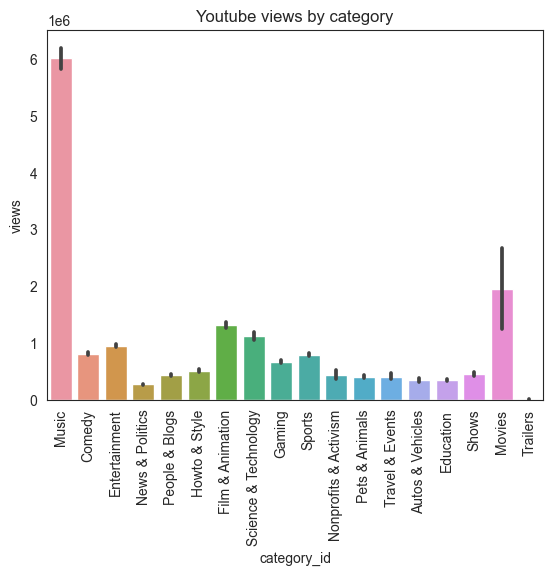

In [18]:
sns.set_palette("RdBu")
sns.set_style('white')
sns.barplot(data = ALL_videos, x = 'category_id', y = 'views')
plt.xticks(rotation = 90)
plt.title("Youtube views by category")
plt.show()

In [12]:
print(ALL_videos['views'].sum())

498712723535


In [13]:
ALL_videos.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
10646,YlvPvUkzdxU,18.09.01,SCHOOL EK JAIL,Angry Prash,Comedy,2018-01-06T09:28:41.000Z,"school|""school funny videos""|""student""|""teache...",449440,54329,848,5567,https://i.ytimg.com/vi/YlvPvUkzdxU/default.jpg,False,False,False,Things I found funny about school. Stupid thin...,India
23018,JVuG4kNF8Nc,18.22.03,Actress Sri Reddy About Pawan Kalyan And YS Ja...,YOYO TV Channel,News & Politics,2018-03-21T13:13:46.000Z,"sri reddy|""actress sri reddy""|""pawan kalyan""|""...",84546,392,153,195,https://i.ytimg.com/vi/JVuG4kNF8Nc/default.jpg,False,False,False,Actress Sri Reddy About Pawan Kalyan And YS Ja...,India
15236,oawNQd6-QKo,18.31.01,"Qui a tué François Fillon ? (Reportage BFM TV,...",Guillaume Faivre,News & Politics,2018-01-30T08:55:52.000Z,"Qui""|""a tué""|""françois""|""fillon""|""reportage""|""...",15615,94,27,47,https://i.ytimg.com/vi/oawNQd6-QKo/default.jpg,False,False,False,"D'affaire en affaire, de coup de théâtre en co...",France
17783,7R1N-8SoqcM,18.13.02,Marshmello x Lil Peep - Spotlight (Official Mu...,Marshmello,Music,2018-02-12T14:00:00.000Z,"marshmello|""lil peep""|""spotlight""|""spotlight m...",1427962,264990,4756,23195,https://i.ytimg.com/vi/7R1N-8SoqcM/default.jpg,False,False,False,Marshmello x Lil Peep - Spotlight\nPurchase & ...,United Kingdom
21604,iEBUpo24nLw,18.24.03,[LIVE] íë¡ì¼êµ¬ KBOë¦¬ê·¸ ë¯¸ëì´ë°ì´&...,ë¦¬ì¼360,People & Blogs,2018-03-22T08:02:23.000Z,"íë¡ì¼êµ¬|""ì¼êµ¬""|""ê¸°ì""|""ìì§""|""ì¼ì...",19034,110,8,39,https://i.ytimg.com/vi/iEBUpo24nLw/default.jpg,False,False,False,2018 KBOíë¡ì¼êµ¬ ë¯¸ëì´ë°ì´&í¬íì¤...,Korea
35894,bF_naHpa-T4,18.06.06,RIP LIL TAY,PewDiePie,Entertainment,2018-06-05T21:14:45.000Z,"SATIRE|""lil tay""|""flexing""|""young""|""9 years""|""...",5021728,370036,5908,49744,https://i.ytimg.com/vi/bF_naHpa-T4/default.jpg,False,False,False,We examine the rise and fall of lil tay the yo...,India
359,pcWKpGzhgq4,17.15.11,Jason Momoa Shows Off His Aquaman Quindent | T...,The Graham Norton Show,Entertainment,2017-11-14T12:13:35.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",391049,5939,106,385,https://i.ytimg.com/vi/pcWKpGzhgq4/default.jpg,False,False,False,It's not a trident. That's for the next film.\...,Germany
13172,AdZpDrdIEU0,18.24.01,20 EVERYDAY HACKS THAT MAKE LIFE EASIER,5-Minute Crafts,Howto & Style,2018-01-20T08:30:00.000Z,"5-Minute Crafts|""DIY""|""Do it yourself""|""crafts...",6263637,53006,5620,2721,https://i.ytimg.com/vi/AdZpDrdIEU0/default.jpg,False,False,False,"Everything from clothes repairing, kitchen and...",India
17291,zpolLN-Z_R0,18.26.05,ãªãã¦ããåããé»åå ä¸ã¦ãã¯ã...,TOMIKKU NET,Entertainment,2018-05-25T12:00:10.000Z,"jintomikku|""ãããã¯""|""ãããã¯ããã...",229853,2607,459,1261,https://i.ytimg.com/vi/zpolLN-Z_R0/default.jpg,False,False,False,LINEã¹ã¿ã³ã https://store.line.me/sticker...,Japan
3559,tz23WFb8HM0,17.01.12,[MV] KARD _ You In Me,1theK (원더케이),Music,2017-11-21T09:00:02.000Z,"Kpop|""1theK""|""원더케이""|""loen""|""로엔""|""뮤비""|""티져""|""MV""...",4287874,312647,3337,16812,https://i.ytimg.com/vi/tz23WFb8HM0/default.jpg,False,False,False,[MV] KARD _ You In Me\n\n*English subtitles ar...,United Kingdom


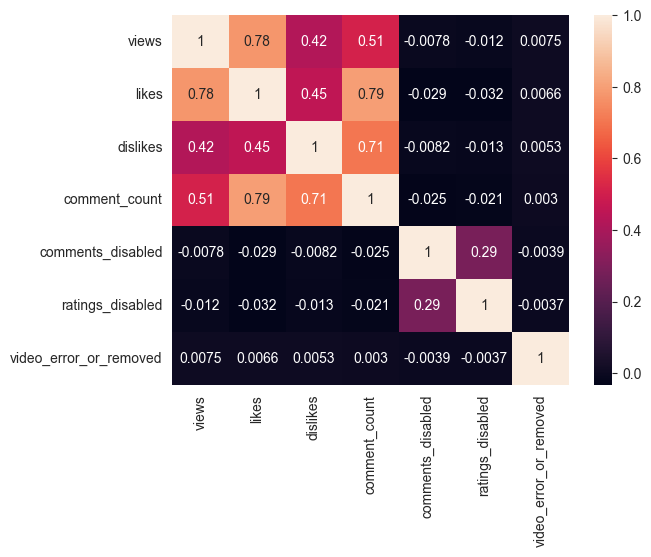

In [14]:
sns.heatmap(ALL_videos.corr(),annot=True);

In [15]:
sns.scatterplot(data=ALL_videos, x="likes", y="views", hue="category")

ValueError: Could not interpret value `category` for parameter `hue`